In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [69]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


## Run the Main Function

In [70]:
fMRIdet()

### Check the current results

In [8]:
print(fMRIdet)

+-------------+-----------------------+--------------------+------+
| Num of CPTs |     Estiamted CPTs    |        MSE         | Rank |
+-------------+-----------------------+--------------------+------+
|      5      | [ 11  29  56  85 157] | 1.3166149955079542 |  6   |
+-------------+-----------------------+--------------------+------+


## Tuning the kappa parameters

In [13]:
kappas = np.arange(1.0, 2.0, step=0.1)
#kappas = [1.45, 1.55, 1.65, 1.75, 1.85, 1.95]
fMRIdet.TuningKappa(kappas)

### Then we  can check the best kappa parameters w.r.t mean square errors

In [14]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.5757575757575757
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via provide the argument `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [16]:
fMRIdet.UpdateEcpts(numChg=5)
fMRIdet.UpdateEcpts()

### Check the results after updating

In [17]:
print(fMRIdet)

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 11.  29.  56.  85. 157.] | 1.3166149955079542 |  6   |
+-------------+----------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


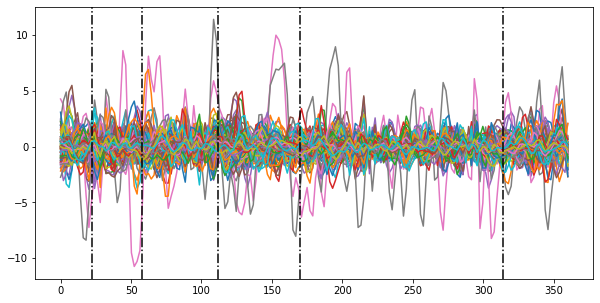

In [18]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

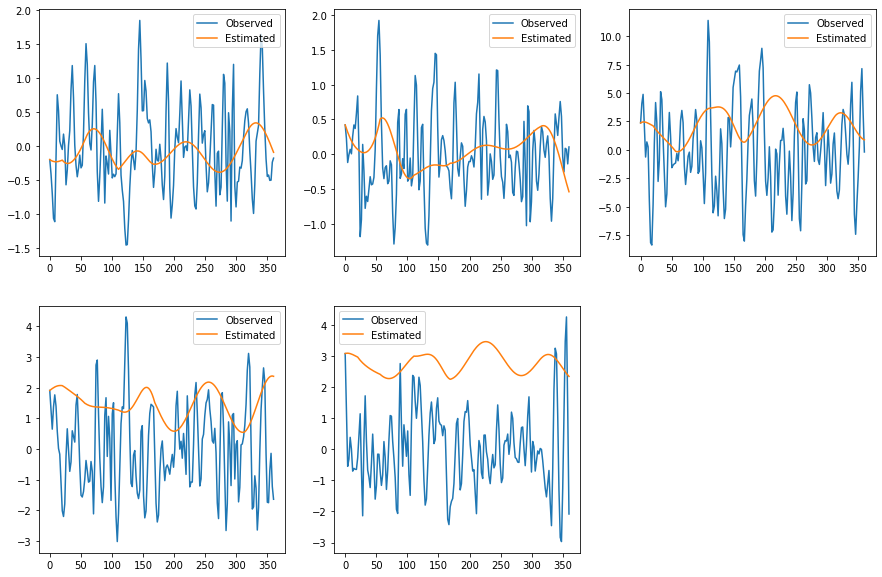

In [19]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

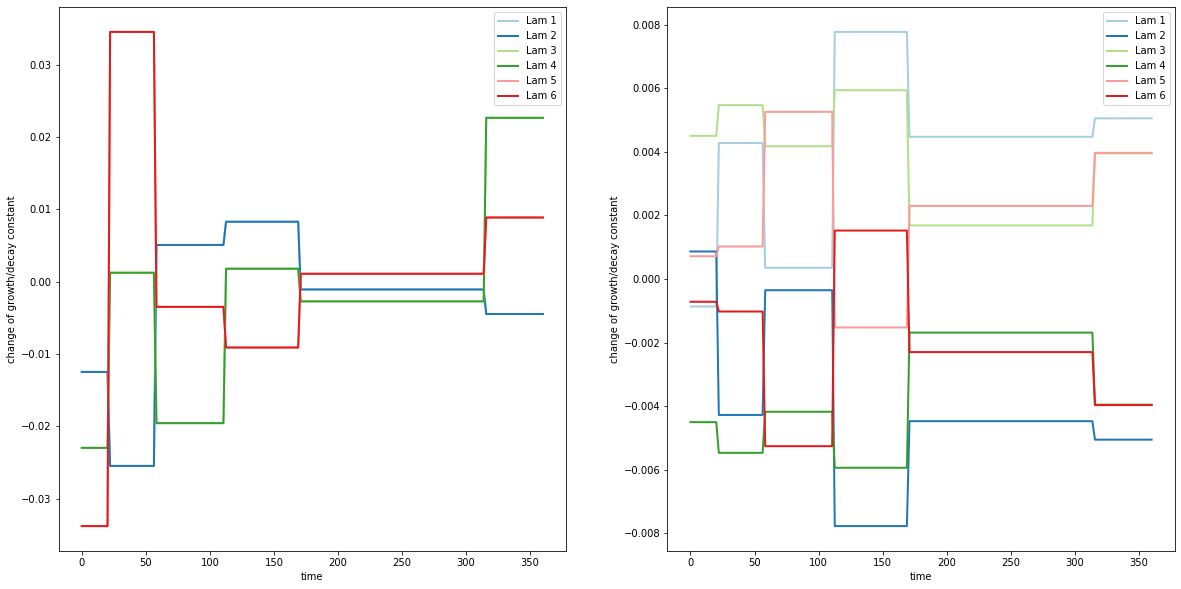

In [20]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

### Results under no change point

In [21]:
fMRIdet.UpdateEcpts(0)

In [22]:
print(fMRIdet)

+-------------+----------------+-------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE        | Rank |
+-------------+----------------+-------------------+------+
|      0      |       []       | 1.346206793028785 |  6   |
+-------------+----------------+-------------------+------+


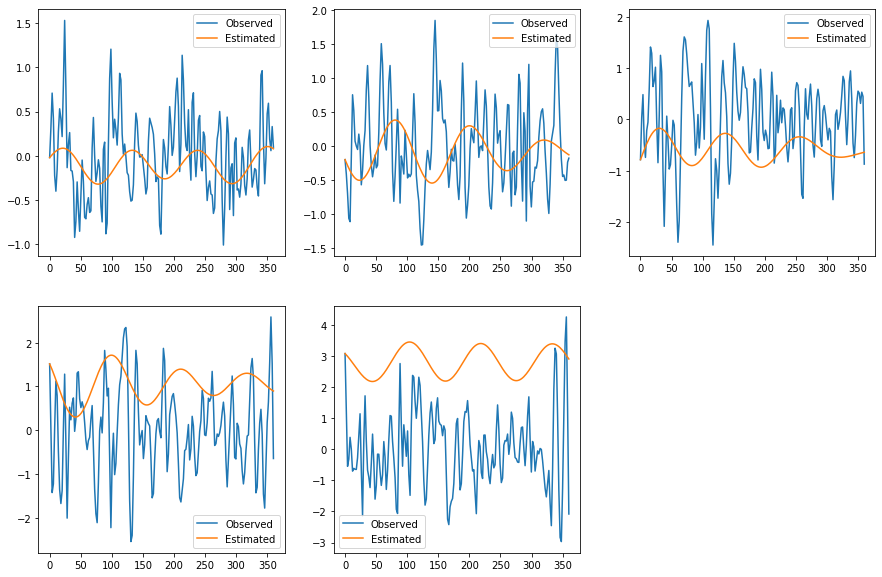

In [23]:
fMRIdet.PlotRecCurve(saveFigPath=None)

## Detection with no Spline smooth

In [6]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [7]:
fMRIdetNoSpl._Preprocess()

In [8]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

### Calculate the derivative of X(t) with dx/dt. 

The last column is imputed by the mean of dXmat

In [9]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [10]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [11]:
fMRIdetNoSpl()

In [12]:
print(fMRIdetNoSpl)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 1.5673732688174131 |  6   |
+-------------+----------------+--------------------+------+


In [13]:
kappas = np.arange(1.0, 3.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

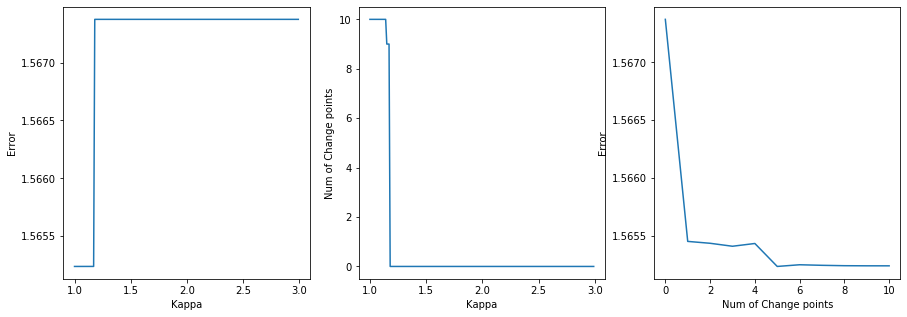

In [14]:
fMRIdetNoSpl.PlotKappaErrCurve()

In [15]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 5


In [17]:
fMRIdetNoSpl.UpdateEcpts()

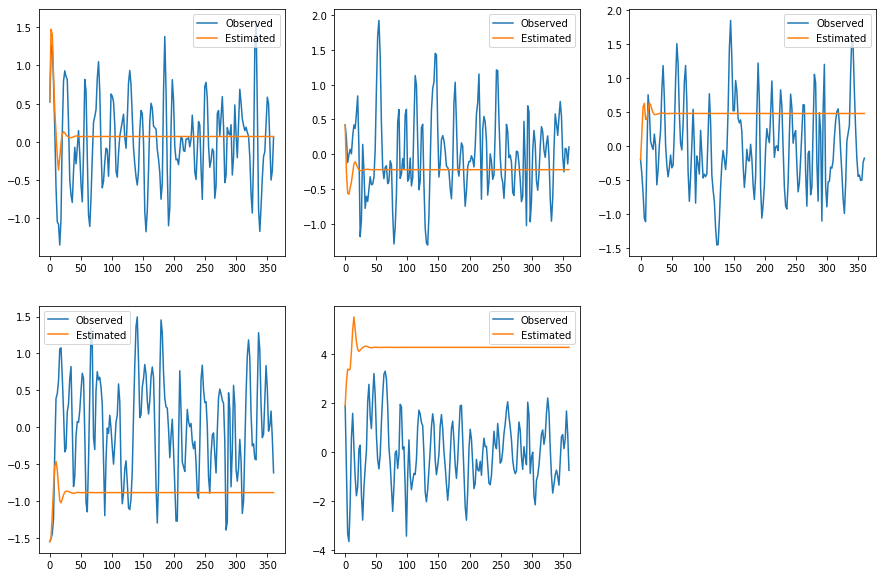

In [18]:
fMRIdetNoSpl.PlotRecCurve()